Time Series Analysis

## 1. Environment setup

In [2]:
conda install pandas-datareader

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge yfinance

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rdmca\anaconda3

  added / updated specs:
    - yfinance


The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2023.05.30~ --> conda-forge::ca-certificates-2023.7.22-h56e8100_0 
  openssl              pkgs/main::openssl-1.1.1u-h2bbff1b_0 --> conda-forge::openssl-1.1.1v-hcfcfb64_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main/win-64::certifi-2023.7.22-p~ --> conda-forge/noarch::certifi-2023.7.22-pyhd8ed1ab_0 
  conda              pkgs/main::conda-23.7.2-py310haa95532~ --> conda-forge::conda-23.7.2-py310h5588dad_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install dash

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rdmca\anaconda3

  added / updated specs:
    - dash


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2023.7.2~ --> pkgs/main::ca-certificates-2023.05.30-haa95532_0 
  certifi            conda-forge/noarch::certifi-2023.7.22~ --> pkgs/main/win-64::certifi-2023.7.22-py310haa95532_0 
  conda              conda-forge::conda-23.7.2-py310h5588d~ --> pkgs/main::conda-23.7.2-py310haa95532_0 
  openssl            conda-forge::openssl-1.1.1v-hcfcfb64_0 --> pkgs/main::openssl-1.1.1u-h2bbff1b_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(188): Could not remove or rename C:\Users\rdmca\anaconda3\Library\bin\libcrypto-1_1-x64.dll.c~.  Please remove this file manually (you may need to reboot to free file handles)


In [5]:
# conda install -c conda-forge matplotlib
conda install matplotlib

SyntaxError: invalid syntax (1026530706.py, line 2)

### 2. Download Stock Prices

#### - Using Yahoo Finance `yfinance` library

In [11]:
# Using pandas datareader and Yahoo Finance
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

In [9]:
 # get the current date and update the last 60 months
from dash import dcc
import datetime as dt

stocks_now = dt.datetime.now()
start = dt.datetime(stocks_now.year-5, stocks_now.month, stocks_now.day)
start

datetime.datetime(2018, 8, 3, 0, 0)

In [12]:
# download multipe stocks into a single dataframe:
all_stocks_list = ['AMZN', 'MMM','META', 'IBM']
all_stocks = yf.download(all_stocks_list, start=start, end=None)
# all_stocks
 # adjusted close prices for FB, MMM, IBM and AMZN
adj_close_prices = all_stocks['Adj Close']
adj_close_prices

[*********************100%***********************]  4 of 4 completed


,AMZN,IBM,META,MMM
Date,,,,
2018-08-03,91.164497,110.564690,177.779999,172.417725
2018-08-06,92.387497,109.314568,185.690002,171.926987
2018-08-07,93.124001,110.048172,183.809998,173.482376
2018-08-08,94.325996,109.958351,185.179993,172.292984
2018-08-09,94.926003,109.542183,183.089996,170.329987
...,...,...,...,...
2023-07-28,132.210007,143.449997,325.480011,111.879997
2023-07-31,133.679993,144.179993,318.600006,111.500000
2023-08-01,131.690002,143.330002,322.709991,110.559998


### 3. Resample the data to get prices for the end of the business month. Select the Adjusted Close for each stock.

In [13]:
import pandas as pd

df_monthly = adj_close_prices.resample('BM').last()
df_monthly

,AMZN,IBM,META,MMM
Date,,,,
2018-08-31,100.635498,110.836060,175.729996,176.612976
2018-09-28,100.150002,114.415054,164.460007,176.437164
2018-10-31,79.900497,87.341660,151.789993,159.313400
2018-11-30,84.508499,95.228157,140.610001,175.289856
2018-12-31,75.098503,87.105385,131.089996,160.637421
...,...,...,...,...
2023-04-28,105.449997,124.709511,240.320007,104.629562
2023-05-31,120.580002,128.589996,264.720001,93.309998
2023-06-30,130.360001,133.809998,286.980011,100.089996


### 4. Plot the autocorrelation of the adjusted month-end close prices for each of the stocks.

<Axes: title={'center': '3M'}, xlabel='Lag', ylabel='Autocorrelation'>

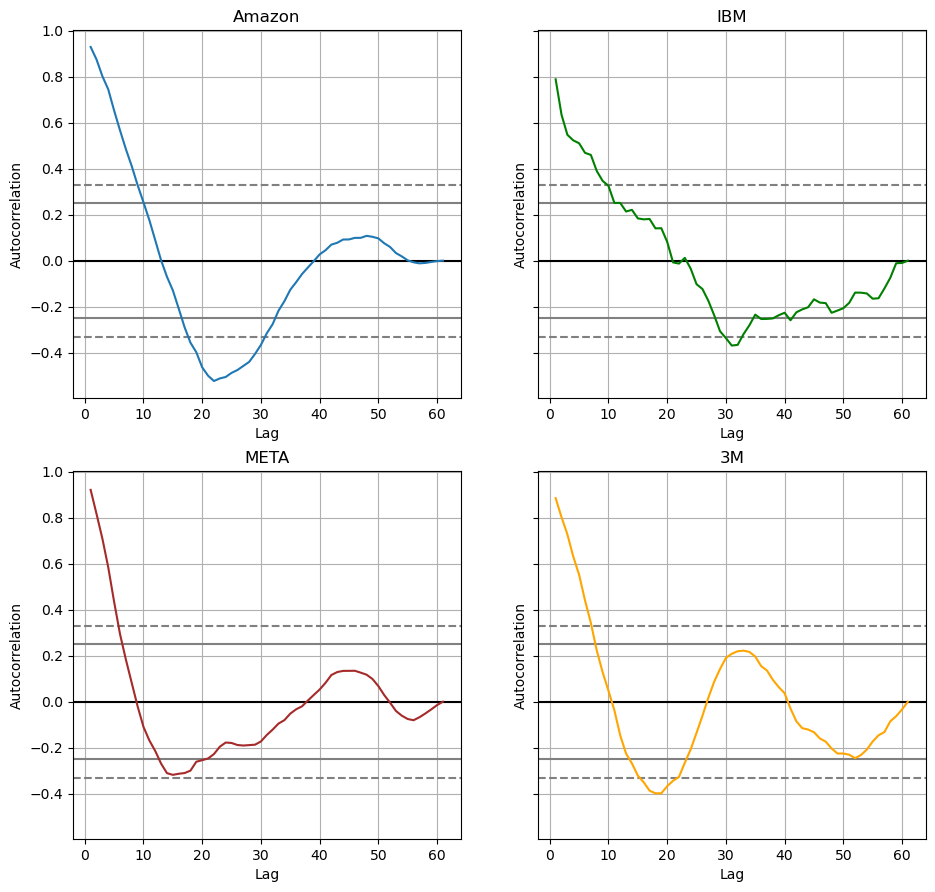

In [14]:
import matplotlib.pyplot as plt
df_monthly_amnz = df_monthly['AMZN']
df_monthly_ibm = df_monthly['IBM']
df_monthly_meta = df_monthly['META']
df_monthly_3m = df_monthly['MMM']

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey=True, figsize=(11,10.5)) 

ax1.set_title('Amazon')
pd.plotting.autocorrelation_plot(df_monthly_amnz, ax=ax1)

ax2.set_title('IBM')
pd.plotting.autocorrelation_plot(df_monthly_ibm, ax=ax2, color = 'green')

ax3.set_title('META')
pd.plotting.autocorrelation_plot(df_monthly_meta, ax=ax3, color = 'brown')

ax4.set_title('3M')
pd.plotting.autocorrelation_plot(df_monthly_3m, ax=ax4, color = 'orange')

- ### Are they autocorrelated?
    The adjusted month-end close prices for each stock are autocorrelected. The plot of Amazon, Meta and 3M show a strong and positive relationship because the values of R are near +1 between 0 and 10 to 13 lags. Also, there is a negative correlation because 10 to 25 and in the case fo Amazon between 13 to 40. IBM as well shows strong and positive relationship between 0 and 20 and negative between 20 to 60.
    When the value are in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As R approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

### 5. Monthly returns for each stock using the "shift trick"

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html
# https://www.scaler.com/topics/pandas-shift/

- #### Amazon Monthly Returns

In [36]:
df_amnz_returns = pd.DataFrame().assign(Current = df_monthly['AMZN'], Before = df_monthly['AMZN'].shift(1), Difference = (df_monthly['AMZN'] - df_monthly['AMZN'].shift(1)), Return = (df_monthly['AMZN'] - df_monthly['AMZN'].shift(1)) /  df_monthly['AMZN'].shift(1))

df_amnz_returns.head()

,Current,Before,Difference,Return
Date,,,,
2018-08-31,100.635498,NaN,NaN,NaN
2018-09-28,100.150002,100.635498,-0.485497,-0.004824
2018-10-31,79.900497,100.150002,-20.249504,-0.202192
2018-11-30,84.508499,79.900497,4.608002,0.057672
2018-12-31,75.098503,84.508499,-9.409996,-0.111350


- #### IBM Monthly Returns

In [16]:
df_ibm_returns = pd.DataFrame().assign(Current = df_monthly['IBM'], Before = df_monthly['IBM'].shift(1), Difference = (df_monthly['IBM'] - df_monthly['IBM'].shift(1)), Return = (df_monthly['IBM'] - df_monthly['IBM'].shift(1)) /  df_monthly['IBM'].shift(1))

df_ibm_returns.head()

,Current,Before,Difference,Return
Date,,,,
2018-08-31,110.836060,NaN,NaN,NaN
2018-09-28,114.415054,110.836060,3.578995,0.032291
2018-10-31,87.341660,114.415054,-27.073395,-0.236624
2018-11-30,95.228157,87.341660,7.886497,0.090295
2018-12-31,87.105385,95.228157,-8.122772,-0.085298


- #### Meta Monthly Returns

In [17]:
df_meta_returns = pd.DataFrame().assign(Current = df_monthly['META'], Before = df_monthly['META'].shift(1), Difference = (df_monthly['META'] - df_monthly['META'].shift(1)), Return = (df_monthly['META'] - df_monthly['META'].shift(1)) /  df_monthly['META'].shift(1))

df_meta_returns.head()

,Current,Before,Difference,Return
Date,,,,
2018-08-31,175.729996,NaN,NaN,NaN
2018-09-28,164.460007,175.729996,-11.269989,-0.064132
2018-10-31,151.789993,164.460007,-12.670013,-0.077040
2018-11-30,140.610001,151.789993,-11.179993,-0.073654
2018-12-31,131.089996,140.610001,-9.520004,-0.067705


- #### 3M Monthly Returns

In [18]:
df_mmm_returns = pd.DataFrame().assign(Current = df_monthly['MMM'], Before = df_monthly['MMM'].shift(1), Difference = (df_monthly['MMM'] - df_monthly['MMM'].shift(1)), Return = (df_monthly['MMM'] - df_monthly['MMM'].shift(1)) /  df_monthly['MMM'].shift(1))

df_mmm_returns.head()

,Current,Before,Difference,Return
Date,,,,
2018-08-31,176.612976,NaN,NaN,NaN
2018-09-28,176.437164,176.612976,-0.175812,-0.000995
2018-10-31,159.313400,176.437164,-17.123764,-0.097053
2018-11-30,175.289856,159.313400,15.976456,0.100283
2018-12-31,160.637421,175.289856,-14.652435,-0.083590


 ### Use pandas autotocorrelation_plot() to plot the autocorrelation of the monthly returns.

In [19]:
# Drop the first row in each return to remove NAN values
df_amnz_returns.drop(index=df_amnz_returns.index[0], axis=0, inplace=True)
df_ibm_returns.drop(index=df_ibm_returns.index[0], axis=0, inplace=True)
df_meta_returns.drop(index=df_meta_returns.index[0], axis=0, inplace=True)
df_mmm_returns.drop(index=df_mmm_returns.index[0], axis=0, inplace=True)

<Axes: title={'center': '3M Returns'}, xlabel='Lag', ylabel='Autocorrelation'>

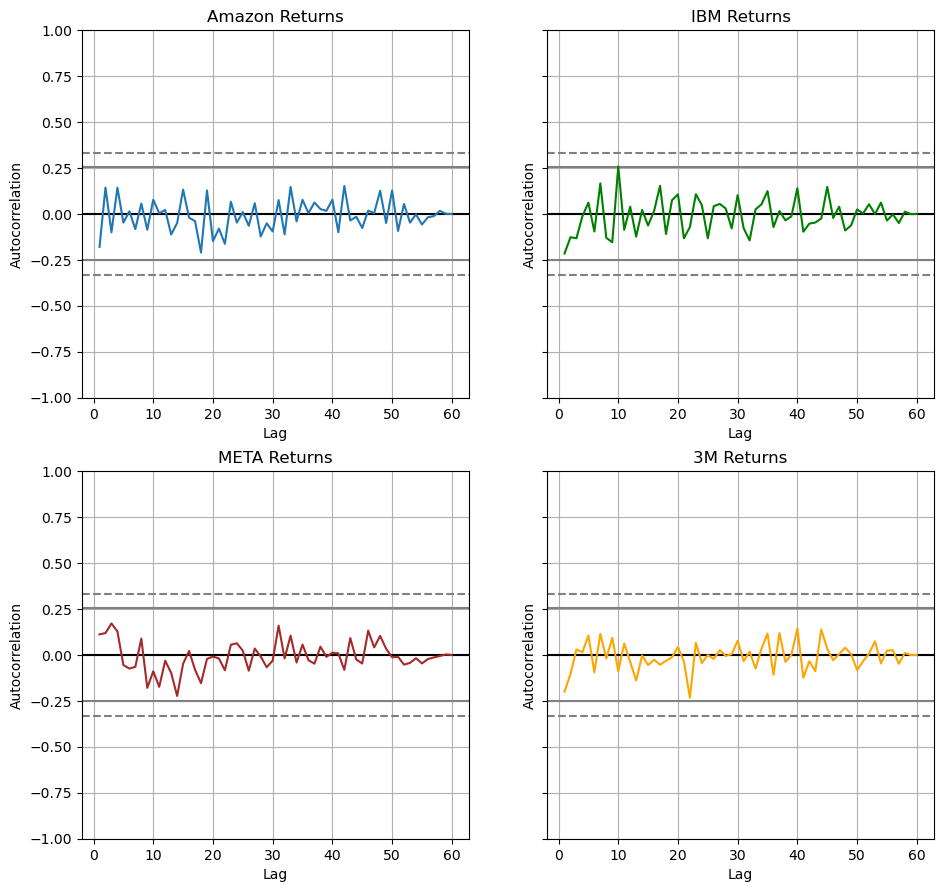

In [20]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey=True, figsize=(11,10.5)) 
plt.ylim(-1, 1)

ax1.set_title('Amazon Returns')
pd.plotting.autocorrelation_plot(df_amnz_returns.Return, ax=ax1)

ax2.set_title('IBM Returns')
pd.plotting.autocorrelation_plot(df_ibm_returns.Return, ax=ax2, color = 'green')

ax3.set_title('META Returns')
pd.plotting.autocorrelation_plot(df_meta_returns.Return, ax=ax3, color = 'brown')

ax4.set_title('3M Returns')
pd.plotting.autocorrelation_plot(df_mmm_returns.Return, ax=ax4, color = 'orange')

- ### Are the returns autocorrelated? Provide short explanation.

According to autocorrelaction plots there is no apparent linear relationship, the correlation coefficient R in each of the four returns is near 0.

### 6. Combine all 4 time series (returns) into a single DataFrame

In [30]:
all_returns =  pd.DataFrame().assign(Amazon = df_amnz_returns['Return'], IBM = df_ibm_returns['Return'], Meta = df_meta_returns['Return'], MMM = df_mmm_returns['Return'])
all_returns.head()

,Amazon,IBM,Meta,MMM
Date,,,,
2018-09-28,-0.004824,0.032291,-0.064132,-0.000995
2018-10-31,-0.202192,-0.236624,-0.077040,-0.097053
2018-11-30,0.057672,0.090295,-0.073654,0.100283
2018-12-31,-0.111350,-0.085298,-0.067705,-0.083590
2019-01-31,0.144317,0.182546,0.271569,0.051223


- ### Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use scatter_matrix() function from pandas.plotting).

array([[<Axes: xlabel='Amazon', ylabel='Amazon'>,
        <Axes: xlabel='IBM', ylabel='Amazon'>,
        <Axes: xlabel='Meta', ylabel='Amazon'>,
        <Axes: xlabel='MMM', ylabel='Amazon'>],
       [<Axes: xlabel='Amazon', ylabel='IBM'>,
        <Axes: xlabel='IBM', ylabel='IBM'>,
        <Axes: xlabel='Meta', ylabel='IBM'>,
        <Axes: xlabel='MMM', ylabel='IBM'>],
       [<Axes: xlabel='Amazon', ylabel='Meta'>,
        <Axes: xlabel='IBM', ylabel='Meta'>,
        <Axes: xlabel='Meta', ylabel='Meta'>,
        <Axes: xlabel='MMM', ylabel='Meta'>],
       [<Axes: xlabel='Amazon', ylabel='MMM'>,
        <Axes: xlabel='IBM', ylabel='MMM'>,
        <Axes: xlabel='Meta', ylabel='MMM'>,
        <Axes: xlabel='MMM', ylabel='MMM'>]], dtype=object)

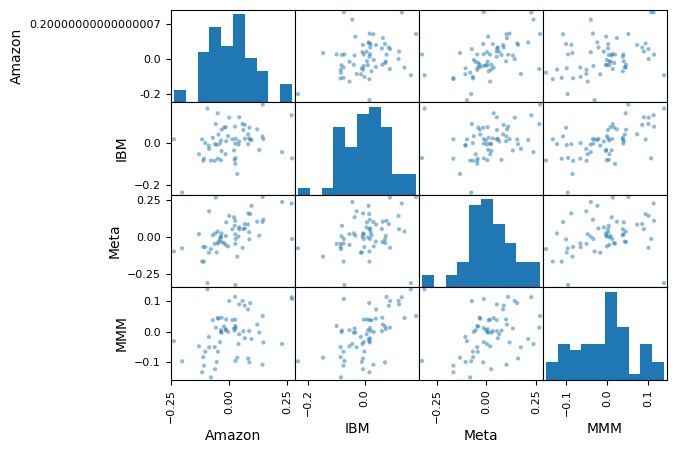

In [31]:
pd.plotting.scatter_matrix(all_returns)

- ### Is there any correlation?

|| Amazon | IBM | META | MMM |
|:--------:|:--------:|:--------:|:--------:|:--------:|
|  **Amazon** |     |  Linear </br> Negative    |  Linear </br> Positive    |  No Relationship |
|  **IBM**    |  No Relationship    |     |  No Relationship    |  Linear </br> Positive |
|  **META**   |  Linear </br> Positive    |  Linear </br> Positive    |     |  Linear</br> Positive    |
|  **MMM**    |  Negative </br> Curve </br> Quadratic    |  Linear </br> Positive    |  Linear </br> Positive    |     |






**If we observe the previous table most of the correlations are Linear Positive**

[<Axes: xlabel='Date'>,
 <Axes: xlabel='Date'>,
 <Axes: xlabel='Date'>,
 <Axes: xlabel='Date'>]

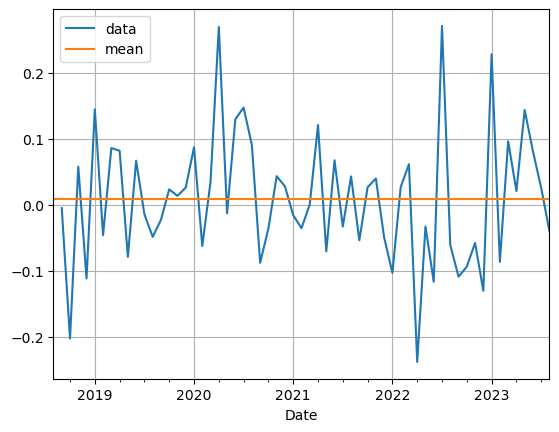

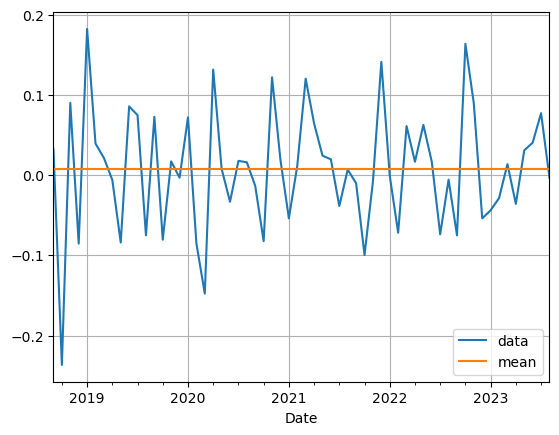

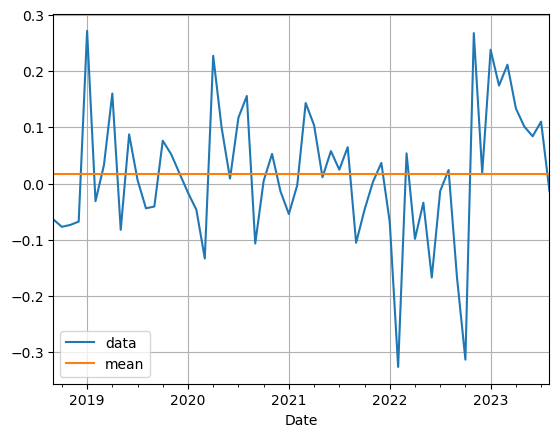

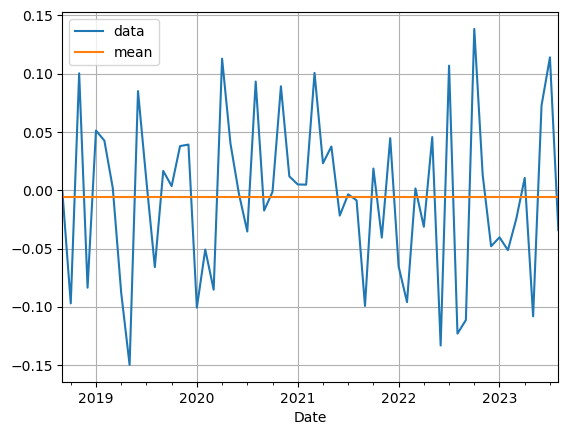

In [38]:
df_am = pd.DataFrame({'data':df_amnz_returns['Return'], 'mean': df_amnz_returns['Return'].mean()})
df_ibm = pd.DataFrame({'data':df_ibm_returns['Return'], 'mean': df_ibm_returns['Return'].mean()})
df_meta = pd.DataFrame({'data':df_meta_returns['Return'], 'mean': df_meta_returns['Return'].mean()})
df_mmm = pd.DataFrame({'data':df_mmm_returns['Return'], 'mean': df_mmm_returns['Return'].mean()})
[df_am.plot(grid=True), df_ibm.plot(grid=True), df_meta.plot(grid=True), df_mmm.plot(grid=True)]
